### Introduction to the pandas library for data science with python

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
#Create a series object that includes the population of 5 countries
ser1=Series([60,45,8,300],index=["France","Spain","Switzerland","US"])

#Display the countries with a population > 50’000’000.
print ser1[ser1>50]

France     60
US        300
dtype: int64


Define name and index name of the serie

In [7]:
ser1.name="Populations"
ser1.index.name="Country"
ser1

Country
France          60
Spain           45
Switzerland      8
US             300
Name: Populations, dtype: int64

Open a webpage

In [3]:
import webbrowser
url="https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records"
webbrowser.open(url)

True

Read a table that is included in a webpage

In [4]:
frame1=pd.read_clipboard()

Display infos about dataframe

In [5]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 1.9+ KB


In [6]:
frame1.head()

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,"2,006","1,226",0.621,1976–77,"3,232",Southwest
1,2,Los Angeles Lakers,"3,235","2,134",0.603,1948–49,"5,369",Pacific
2,3,Boston Celtics,"3,221","2,257",0.588,1946–47,"5,478",Atlantic
3,4,Phoenix Suns,"2,122","1,766",0.546,1968–69,"3,888",Pacific
4,5,Oklahoma City Thunder,"2,139","1,831",0.539,1967–68,"3,970",Northwest


In [7]:
frame1.columns

Index([u'Rank', u'Team', u'Won', u'Lost', u'Pct.', u'First NBA Season',
       u'Total Games', u'Division'],
      dtype='object')

Clean the obtained data to apply statistics

In [8]:
for name in ["Won","Lost","Total Games"]:
    frame1[name]=frame1[name].str.replace(",","")
    frame1[name]=pd.to_numeric(frame1[name])

Import demo_ventes into a dataframe

In [28]:
FrameSales=pd.read_csv("demo_ventes.csv",sep=";")

Scrap a table directly from the web

In [11]:
from pandas import read_html
dframe_list=pd.io.html.read_html("https://www.fdic.gov/bank/individual/failed/banklist.html")

In [12]:
frame_bank=dframe_list[0]

Import an Excel file into a dataframe

In [13]:
ExcelObject=pd.ExcelFile("excel-data.xlsx")

In [14]:
ExcelObject.sheet_names

[u'sheet1', u'Feuil1', u'Feuil2', u'Feuil3']

In [15]:
frameExcel=ExcelObject.parse(ExcelObject.sheet_names[0])

Import credit2.xlsx and merge it with credit1

In [16]:
credit2=pd.ExcelFile("credit2.xlsx")
frameCredit2=credit2.parse()
frameCredit1=pd.read_table("credit1.txt")
frameCreditGlobal=pd.merge(frameCredit1,frameCredit2,how='left')

#### Some simple data visualization with matplotlib

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

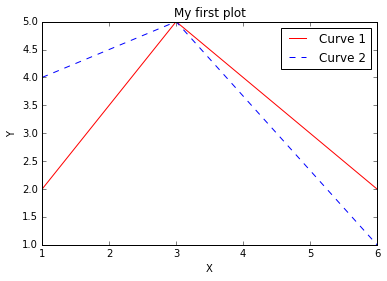

In [19]:
plt.plot([1,3,6],[2,5,2],"r-",label="Curve 1")
plt.plot([1,3,6],[4,5,1],"b--", label="Curve 2")
plt.title("My first plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

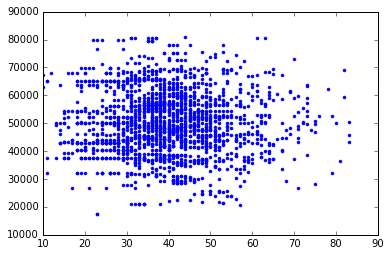

In [20]:
plt.plot(frameCreditGlobal["Age"],frameCreditGlobal["Income"],"b.")

(array([   2.,   22.,   17.,   35.,   56.,   71.,  172.,  177.,  222.,
         193.,  214.,  181.,  185.,  112.,   93.,  132.,   56.,   22.,
          12.,   26.]),
 array([ 17418. ,  20590.8,  23763.6,  26936.4,  30109.2,  33282. ,
         36454.8,  39627.6,  42800.4,  45973.2,  49146. ,  52318.8,
         55491.6,  58664.4,  61837.2,  65010. ,  68182.8,  71355.6,
         74528.4,  77701.2,  80874. ]),
 <a list of 20 Patch objects>)

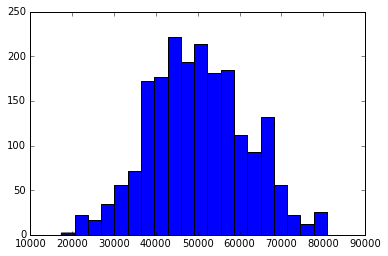

In [21]:
plt.hist(frameCreditGlobal["Income"],bins=20)

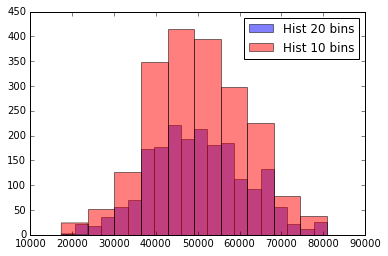

In [22]:
plt.hist(frameCreditGlobal["Income"],bins=20,color="blue",alpha=0.5,label="Hist 20 bins")
plt.hist(frameCreditGlobal["Income"],bins=10,color="red",alpha=0.5, label="Hist 10 bins")
plt.legend()

Use seaborn for other visualizations

In [23]:
import seaborn as sns

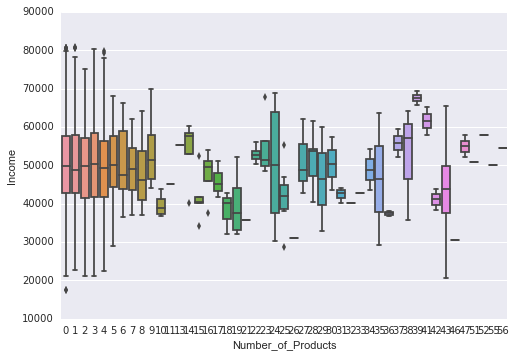

In [24]:
sns.boxplot(frameCreditGlobal["Number_of_Products"],frameCreditGlobal["Income"])

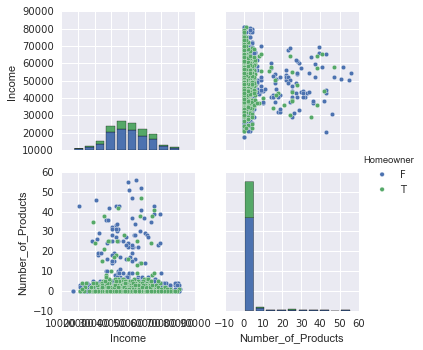

In [25]:
sns.pairplot(frameCreditGlobal[["Income","Number_of_Products","Homeowner"]],hue="Homeowner")

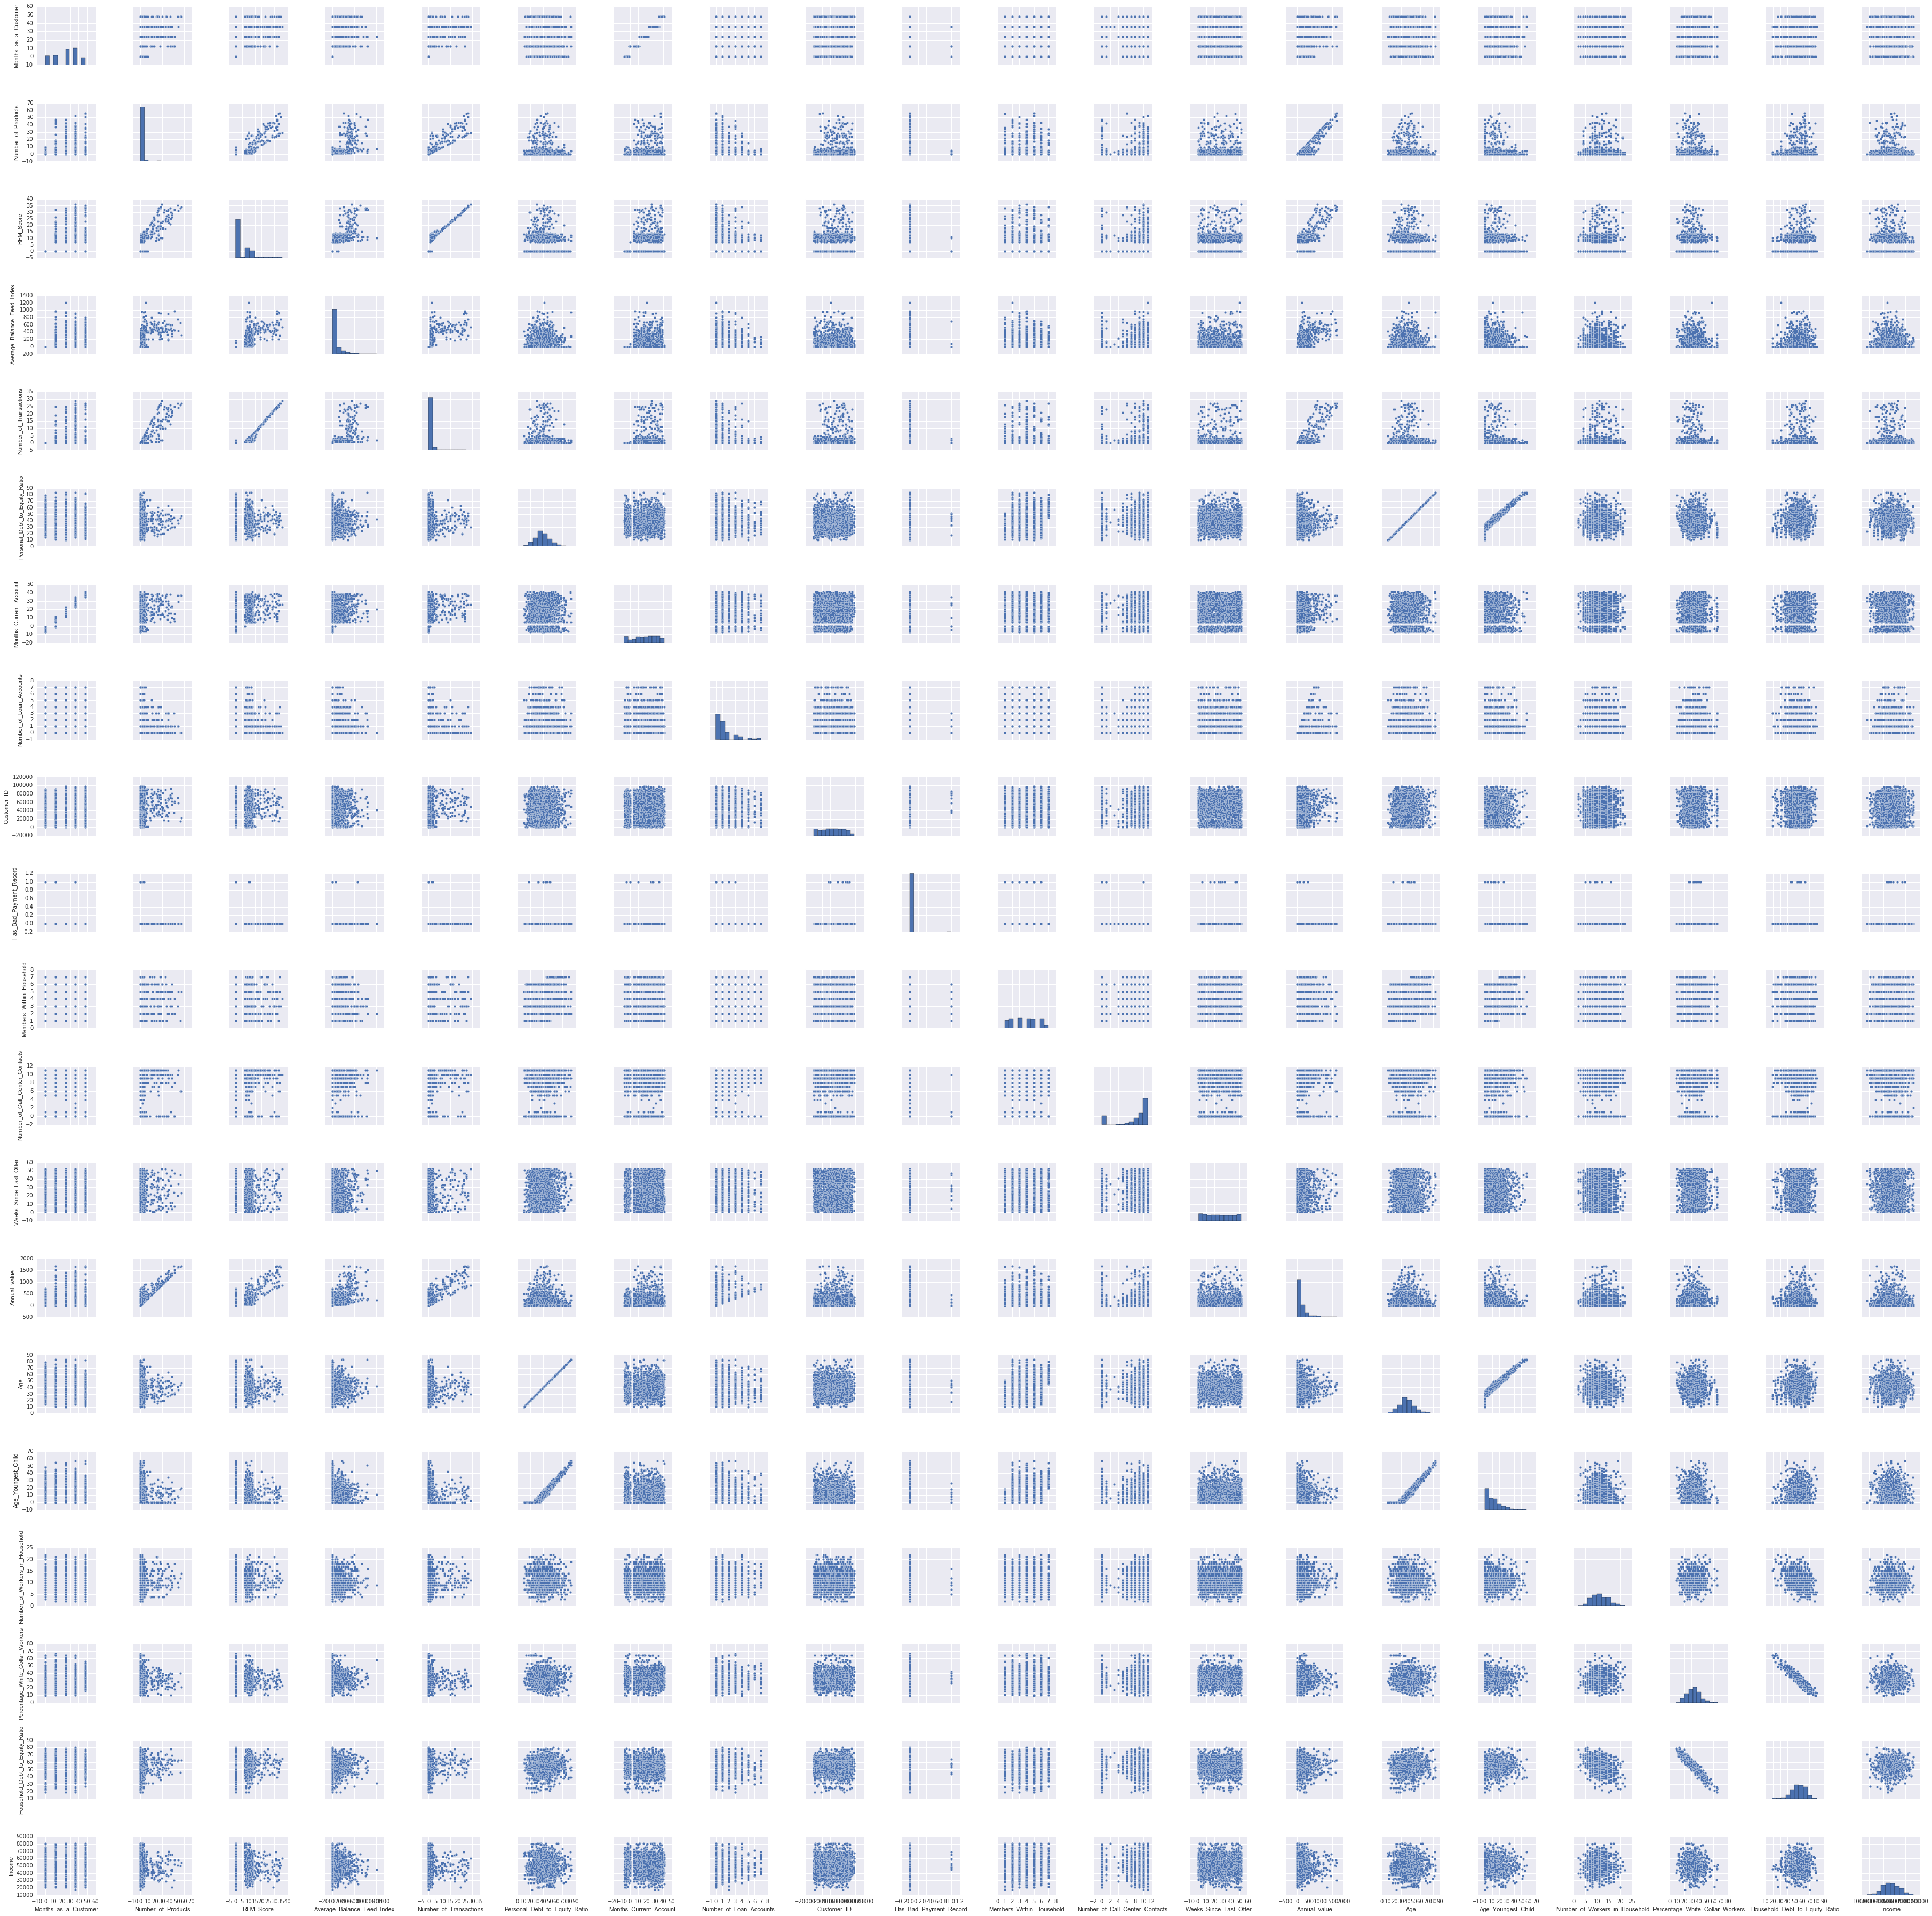

In [26]:
sns.pairplot(frameCreditGlobal)

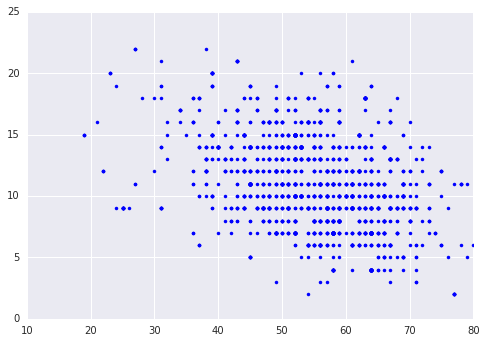

In [126]:
plt.plot(frameCreditGlobal["Household_Debt_to_Equity_Ratio"],
         frameCreditGlobal["Number_of_Workers_in_Household"],"b.")

We compute the correlation matrix

In [27]:
frameCreditGlobal.corr()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,Members_Within_Household,Number_of_Call_Center_Contacts,Weeks_Since_Last_Offer,Annual_value,Age,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income
Months_as_a_Customer,1.000000,0.105470,0.199877,0.168463,0.133308,-0.013431,0.974170,0.001744,0.021141,-0.003034,0.016676,0.023101,-0.006201,0.086369,-0.013431,-0.011815,-0.017930,0.011790,-0.003404,-0.065827
Number_of_Products,0.105470,1.000000,0.779731,0.677067,0.917313,-0.006953,0.102982,-0.000766,0.078697,-0.011836,0.020088,-0.005831,-0.026057,0.808728,-0.006953,-0.005040,0.020253,-0.052881,0.042468,-0.035771
RFM_Score,0.199877,0.779731,1.000000,0.811204,0.823744,-0.006490,0.194995,0.023727,0.043182,-0.018260,0.042340,0.006728,-0.020447,0.644897,-0.006490,-0.004820,0.007346,-0.018144,0.014871,-0.051129
Average_Balance_Feed_Index,0.168463,0.677067,0.811204,1.000000,0.682285,-0.022144,0.166014,0.027460,0.012468,0.002831,0.014165,-0.009015,-0.026274,0.564019,-0.022144,-0.019009,0.009012,-0.007836,0.004861,-0.048886
Number_of_Transactions,0.133308,0.917313,0.823744,0.682285,1.000000,-0.003180,0.126495,-0.000387,0.064598,-0.012810,0.015716,-0.004853,-0.007474,0.742042,-0.003180,-0.003587,0.018348,-0.049583,0.040737,-0.047174
Personal_Debt_to_Equity_Ratio,-0.013431,-0.006953,-0.006490,-0.022144,-0.003180,1.000000,-0.013267,0.008309,-0.013669,0.000953,0.188681,-0.019085,0.026197,-0.000739,1.000000,0.954742,-0.017783,-0.008544,0.017334,-0.022790
Months_Current_Account,0.974170,0.102982,0.194995,0.166014,0.126495,-0.013267,1.000000,-0.008288,0.017818,-0.007258,0.014701,0.022630,-0.002301,0.078456,-0.013267,-0.013236,-0.017704,0.016422,-0.008032,-0.064207
Number_of_Loan_Accounts,0.001744,-0.000766,0.023727,0.027460,-0.000387,0.008309,-0.008288,1.000000,-0.005793,-0.021688,0.042806,-0.011822,-0.011267,0.587563,0.008309,0.009783,0.037175,0.093151,-0.095471,0.021943
Customer_ID,0.021141,0.078697,0.043182,0.012468,0.064598,-0.013669,0.017818,-0.005793,1.000000,0.046226,-0.005724,0.002177,-0.003725,0.060273,-0.013669,-0.018231,0.028895,-0.006125,-0.002319,0.017105
Has_Bad_Payment_Record,-0.003034,-0.011836,-0.018260,0.002831,-0.012810,0.000953,-0.007258,-0.021688,0.046226,1.000000,0.006931,-0.119841,0.006183,-0.022334,0.000953,0.005193,-0.019555,0.011484,-0.002436,0.019428


We create a dataset and add missing values

In [29]:
frameMiss=DataFrame(np.random.randn(100).reshape(10,10),index=range(1,11))
frameMiss[5][9]=np.NaN

We use the deletion method to drop missing

In [30]:
frameDeletion=frameMiss.dropna()

We use imputation by the mean

In [154]:
FrameImpute=frameMiss.fillna(frameMiss.median())

We check for outliers manually

In [31]:
var_name="Household_Debt_to_Equity_Ratio"
frameCreditGlobal[np.abs(frameCreditGlobal[var_name]-frameCreditGlobal[var_name].mean())>
                  3*frameCreditGlobal[var_name].std()]

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
124,36,1,10,104,1,23,23,3,17713,0,...,F,23,M,S,0,15,65,19,45799,F
303,24,4,10,19,2,23,17,2,27333,0,...,F,23,F,S,0,9,65,25,46236,T
533,24,3,8,223,2,26,15,3,2624,0,...,F,26,M,S,0,15,65,19,45799,F
620,36,0,0,0,0,35,34,1,35724,0,...,F,35,M,U,6,12,64,22,49095,F
622,12,0,0,0,0,14,10,2,35577,0,...,F,14,F,S,0,9,65,25,46236,F
817,36,0,0,0,0,50,31,1,28939,0,...,F,50,F,S,21,16,61,21,50087,T
819,24,0,0,0,0,29,11,2,29091,0,...,F,29,F,S,0,9,65,25,46236,F
893,12,0,0,0,0,28,-1,3,45456,0,...,F,28,M,U,3,9,66,24,51274,F
947,24,4,8,79,2,28,17,2,40558,0,...,F,28,F,S,0,9,65,25,46236,F
1083,24,0,0,0,0,43,14,0,63781,0,...,F,43,M,S,19,20,55,23,46019,T


In [32]:
df = pd.DataFrame(np.random.randn(1000, 3)) 
from scipy import stats 
df[(np.abs(stats.zscore(df)) > 3)] 

,0,1,2
93,0.502614,-3.312986,-2.624993
129,1.687246,-3.327207,0.738394
162,3.071643,-0.525694,1.332091
323,-0.563550,-0.053785,-3.068955
565,-3.073761,-0.178303,0.938753
586,3.639986,-2.067574,1.152798
656,3.219816,-1.639746,0.668488
664,1.335812,-3.357394,-0.561374
692,3.300749,-1.074547,0.521807


In [33]:
#store z-scores
X=stats.zscore(df)

Use discretization to transform Income

In [34]:
frameCreditGlobal["Gender"].value_counts()

M    1017
F     983
Name: Gender, dtype: int64

In [35]:
frameCreditGlobal["IncomeDisc1"]=pd.cut(frameCreditGlobal["Income"],5,labels=["a","b","c","d","e"])

In [36]:
frameCreditGlobal["IncomeDisc1"].value_counts()

c    810
d    522
b    476
e    116
a     76
Name: IncomeDisc1, dtype: int64

In [37]:
frameCreditGlobal["IncomeDisc2"]=pd.qcut(frameCreditGlobal["Income"],5)

In [38]:
frameCreditGlobal["IncomeDisc2"].value_counts()

[17418, 40287]        412
(52507.8, 59921]      402
(46418.2, 52507.8]    400
(59921, 80874]        398
(40287, 46418.2]      388
Name: IncomeDisc2, dtype: int64

Use of some transformation on the data

In [39]:
BoxCoxTransform=stats.boxcox(frameCreditGlobal["Percentage_White_Collar_Workers"])

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
Transform=StandardScaler()
Transform

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
Transform.fit(frameCreditGlobal["Income"])

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
frameCreditGlobal["IncomeSted"]=Transform.transform(frameCreditGlobal["Income"])

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
